## Import Libraries

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

## Import Data

In [328]:
df = pd.read_csv("Leads X Education.csv")
pd.set_option("display.max_columns",0)

In [329]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [330]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [332]:
df.isna().sum().sort_values(ascending=False).head(20)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

## Check Numeric and Categorical Features

In [333]:
categorical_col = df.select_dtypes(exclude =["number"]).drop("Prospect ID", axis=1).columns.values
numerical_col = df.select_dtypes(include =["number"]).drop("Lead Number", axis=1).columns.values

In [334]:
print("CATEGORICAL FEATURES : \n {} \n\n".format(categorical_col))
print("NUMERICAL FEATURES : \n {} ".format(numerical_col))

CATEGORICAL FEATURES : 
 ['Lead Origin' 'Lead Source' 'Do Not Email' 'Do Not Call' 'Last Activity'
 'Country' 'Specialization' 'How did you hear about X Education'
 'What is your current occupation'
 'What matters most to you in choosing a course' 'Search' 'Magazine'
 'Newspaper Article' 'X Education Forums' 'Newspaper'
 'Digital Advertisement' 'Through Recommendations'
 'Receive More Updates About Our Courses' 'Tags' 'Lead Quality'
 'Update me on Supply Chain Content' 'Get updates on DM Content'
 'Lead Profile' 'City' 'Asymmetrique Activity Index'
 'Asymmetrique Profile Index' 'I agree to pay the amount through cheque'
 'A free copy of Mastering The Interview' 'Last Notable Activity'] 


NUMERICAL FEATURES : 
 ['Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit' 'Asymmetrique Activity Score'
 'Asymmetrique Profile Score'] 


In [335]:
df[numerical_col].head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,0,0.0,0,0.0,15.0,15.0
1,0,5.0,674,2.5,15.0,15.0
2,1,2.0,1532,2.0,14.0,20.0
3,0,1.0,305,1.0,13.0,17.0
4,1,2.0,1428,1.0,15.0,18.0


In [336]:
df[categorical_col].head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,No,No,Modified
1,API,Organic Search,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified
4,Landing Page Submission,Google,No,No,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified


## Check Data and Missing Values

In [337]:
def Cat_info(df, categorical_column):
    df_result = pd.DataFrame(columns=["columns","values","unique_values","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in categorical_column:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [338]:
df_cat = Cat_info(df, categorical_col)
df_cat

,values,unique_values,null_values,null_percent
columns,,,,
Lead Quality,"[Low in Relevance, nan, Might be, Not Sure, Wo...",5,4767,51.6
Asymmetrique Activity Index,"[02.Medium, 01.High, 03.Low, nan]",3,4218,45.6
Asymmetrique Profile Index,"[02.Medium, 01.High, 03.Low, nan]",3,4218,45.6
Tags,"[Interested in other courses, Ringing, Will re...",26,3353,36.3
Lead Profile,"[Select, Potential Lead, nan, Other Leads, Lat...",6,2709,29.3
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.3
What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.1
Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.6
How did you hear about X Education,"[Select, Word Of Mouth, Other, nan, Online Sea...",10,2207,23.9


In [339]:
def Num_info(df, numerical_column):
    df_result = pd.DataFrame(columns=["columns","unique_values","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in numerical_column:
        df_temp["columns"] = [value]
        df_temp["unique_values"] = df[value].nunique()
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)

    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [340]:
df_num = Num_info(df, numerical_col)
df_num

,unique_values,null_values,null_percent
columns,,,
Asymmetrique Activity Score,12,4218,45.6
Asymmetrique Profile Score,10,4218,45.6
TotalVisits,41,137,1.5
Page Views Per Visit,114,137,1.5
Converted,2,0,0.0
Total Time Spent on Website,1731,0,0.0


## Check for Class Imbalance

In [341]:
print("No of Converted clients out of 9240: \n{}\n".format(df["Converted"].value_counts()))
print("Percentage of Converted clients: \n{}".format((df["Converted"].value_counts()/9240*100).round(2)))

No of Converted clients out of 9240: 
0    5679
1    3561
Name: Converted, dtype: int64

Percentage of Converted clients: 
0    61.46
1    38.54
Name: Converted, dtype: float64


## Detect Outliers in Continuous Columns

In [342]:
def Detect_outliers(df,col):
    df_outliers = pd.DataFrame(columns = ["columns", "outliers","lower_fence","higher_fence"])
    df_temp = pd.DataFrame()
    for column in col:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3-q1
        fence_low = q1 - (iqr*1.5)
        fence_high = q3 + (iqr*1.5)
        outlier = df[column][((df[column]>fence_high) | (df[column]<fence_low))].count() 
        df_temp["outliers"] = [outlier]
        df_temp["columns"] = column
        df_temp["lower_fence"] = fence_low
        df_temp["higher_fence"] = fence_high
        df_outliers = df_outliers.append(df_temp)
    df_outliers.set_index("columns", inplace=True)
    df_outliers.sort_values("outliers", ascending=False, inplace=True)
    return df_outliers

In [343]:
continuous_col = ['TotalVisits', 'Total Time Spent on Website',
                 'Page Views Per Visit', 'Asymmetrique Activity Score',
                 'Asymmetrique Profile Score']
df_out = Detect_outliers(df,continuous_col)
df_out 

,outliers,lower_fence,higher_fence
columns,,,
Asymmetrique Activity Score,716,12.5,16.5
Page Views Per Visit,360,-2.0,6.0
TotalVisits,267,-5.0,11.0
Total Time Spent on Website,0,-1374.0,2322.0
Asymmetrique Profile Score,0,10.5,22.5


### Observations : 
- There are null values in majority of the columns.
- The class distribution in the target is ~61:39. This is an indication of some imbalance.
- As per the IQR methodology, there are outliers in 3 columns.


# EDA & DATA VISUALIZATION

## Univariate analysis of Categorical columns

In [344]:
data =df.copy()

In [345]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [346]:
def fill_missing_values(df,col,n):
    for column in col:
        if n is "mean":
            df[column].fillna(df[column].mean(), inplace=True)
        elif n is "mode":
            df[column].fillna(df[column].mode(), inplace=True)
        elif n is "median":
            df[column].fillna(df[column].median(), inplace=True)
        elif n is "missing":
            df[column].fillna("---Missing---", inplace=True)
        else:
            print("Enter 'mean','median','mode' or 'missing'")
 

In [347]:
fill_missing_values(data,categorical_col,"missing")

In [348]:
def plot_categorical(df,col,num):
    for column in col:
        if (df[column].nunique()<num) and (df[column].nunique()!=1) :
            fig, (ax1, ax2)= plt.subplots(1,2, figsize=(15,5))
            sns.countplot(df[column],ax=ax1, palette="husl")
            ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
            sns.countplot(df[column],hue=df["Converted"],ax=ax2)
            ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)
            ax2.set_ylabel("")
            ax2.legend(["NOT CONVERTED","CONVERTED"],loc="upper right")
    for column in col:
        if df[column].nunique()>=num:
            fig, (ax1, ax2)= plt.subplots(2,1, figsize=(15,8))
            sns.countplot(df[column],ax=ax1, palette="husl")
            ax1.set_xticklabels([])
            ax1.set_xlabel("")
            sns.countplot(df[column],hue=df["Converted"],ax=ax2)
            ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)
            ax2.legend(["NOT CONVERTED","CONVERTED"], loc="upper right")

/Users/subodhjain/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


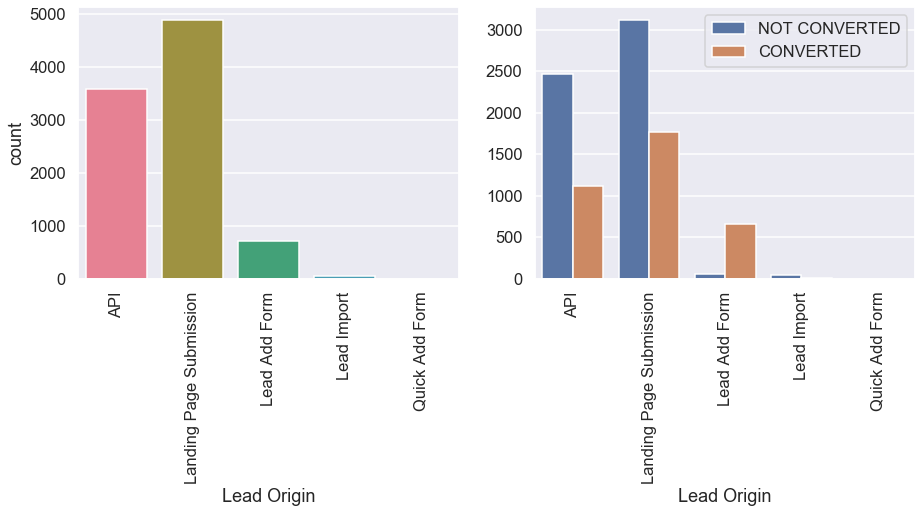

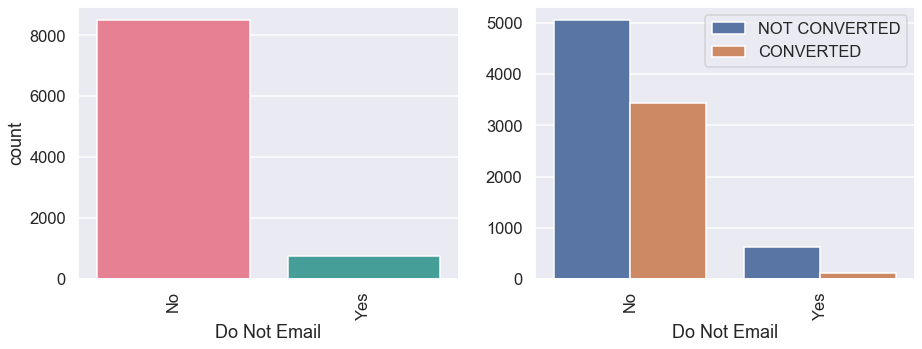

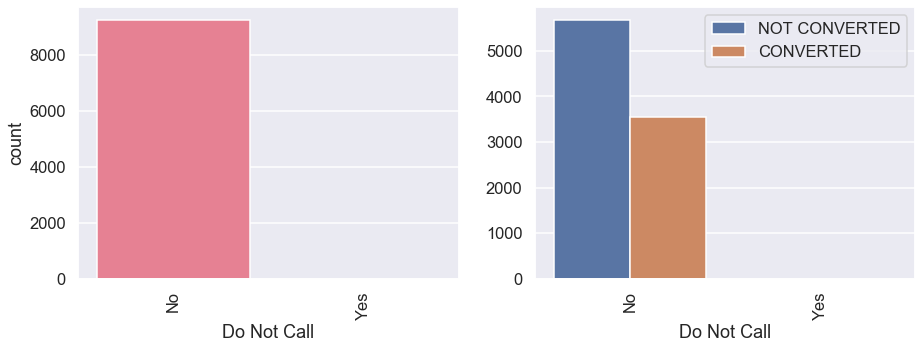

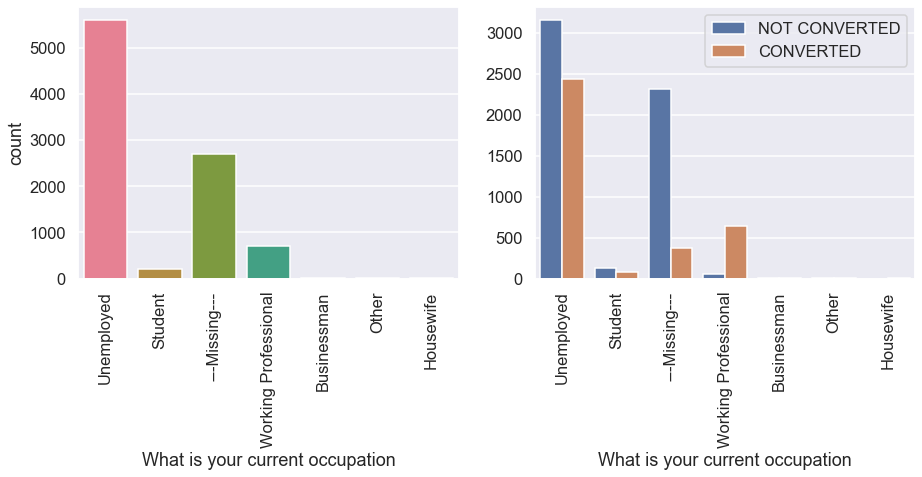

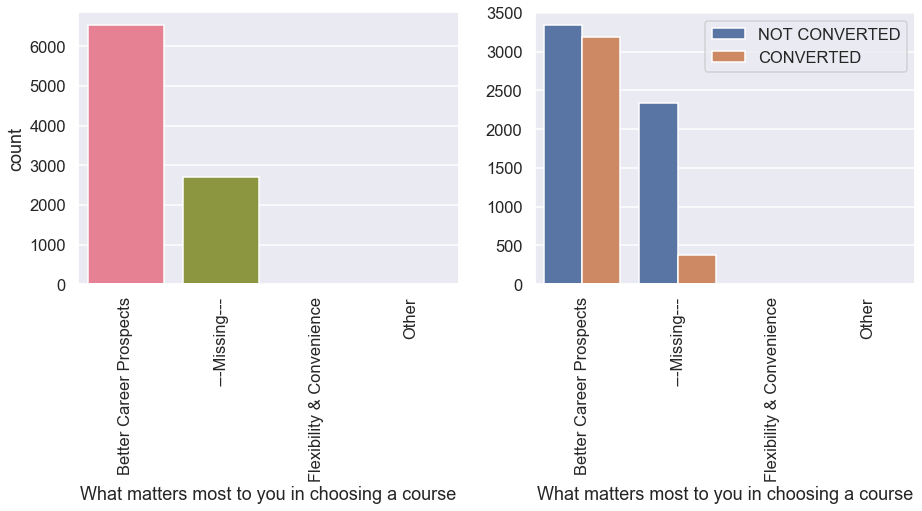

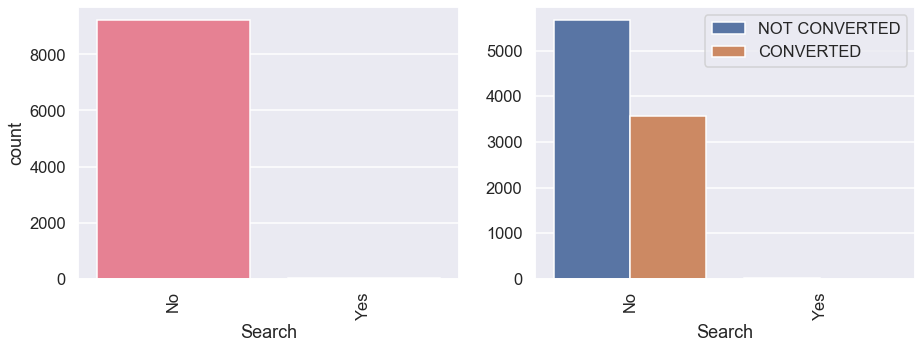

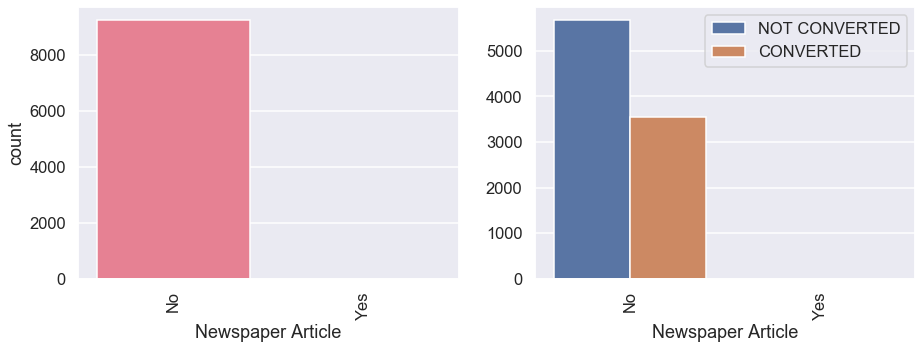

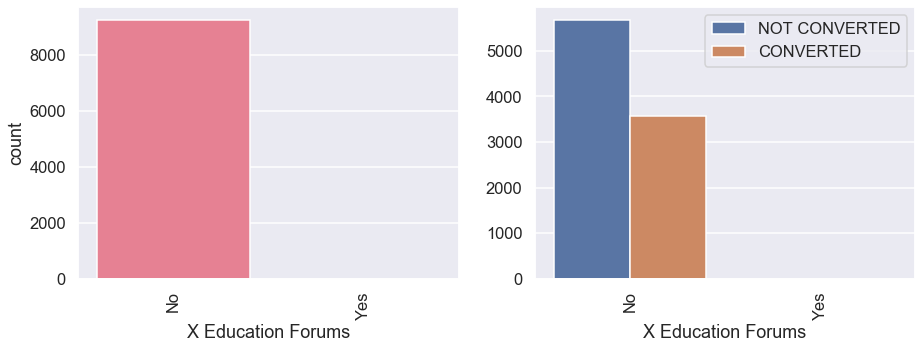

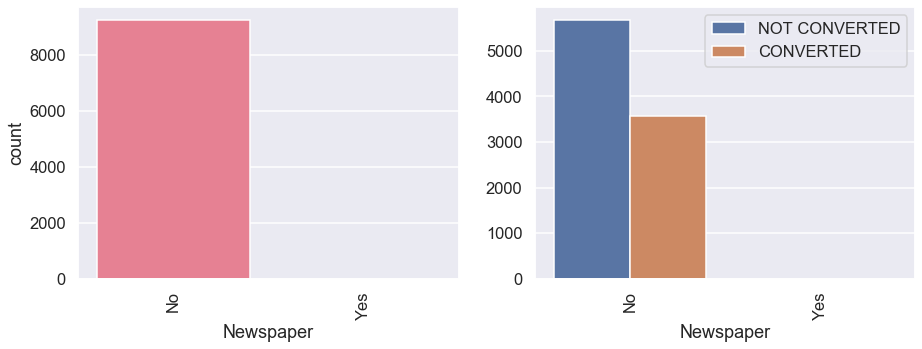

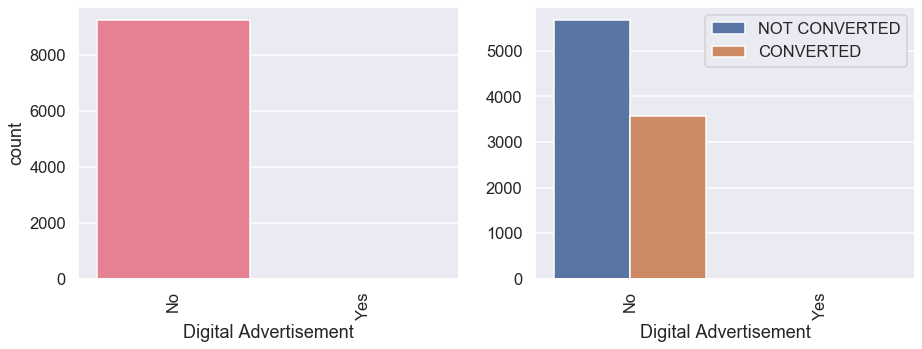

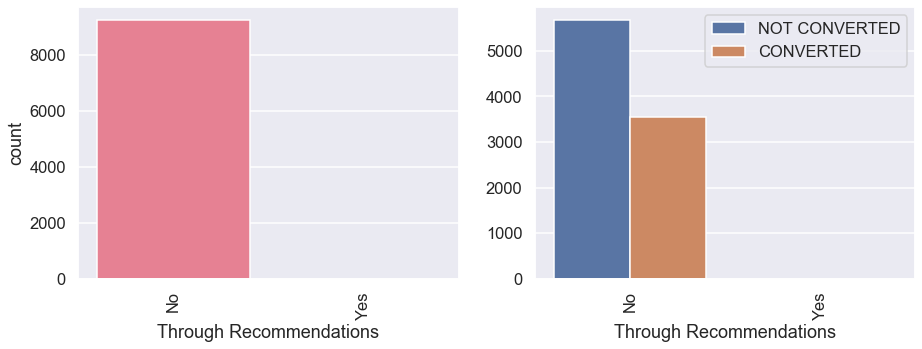

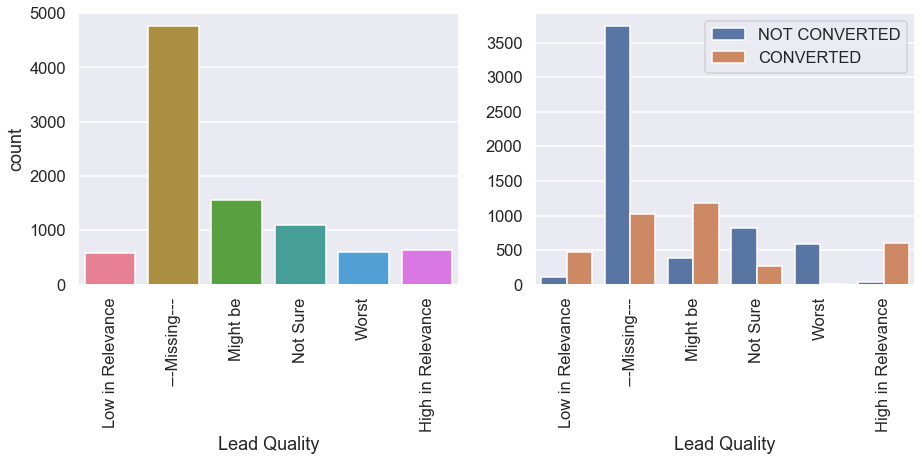

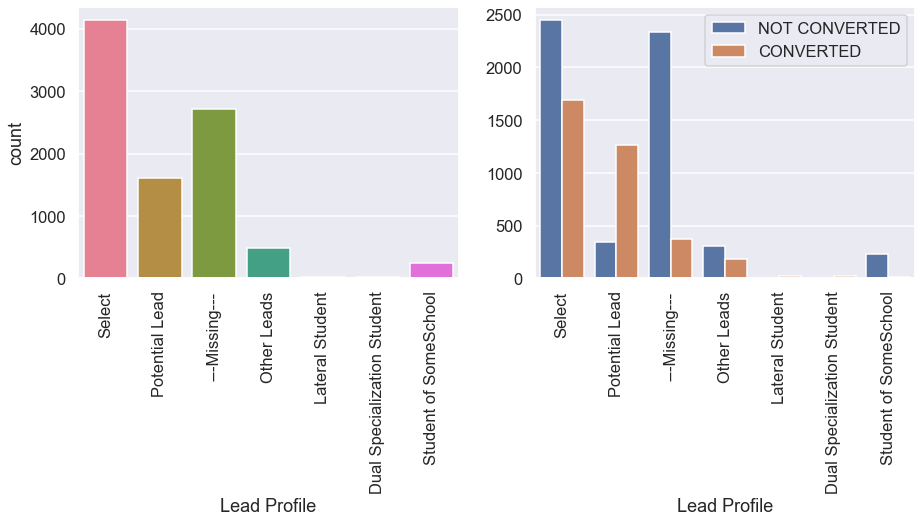

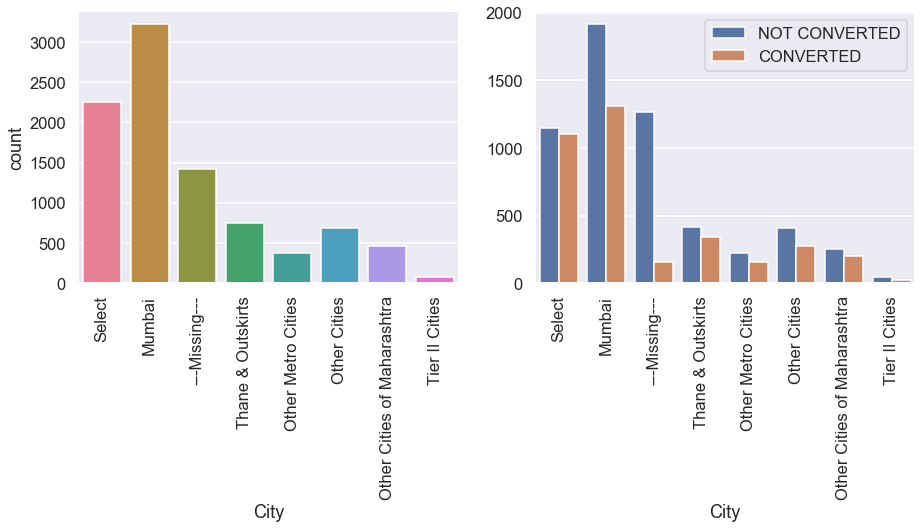

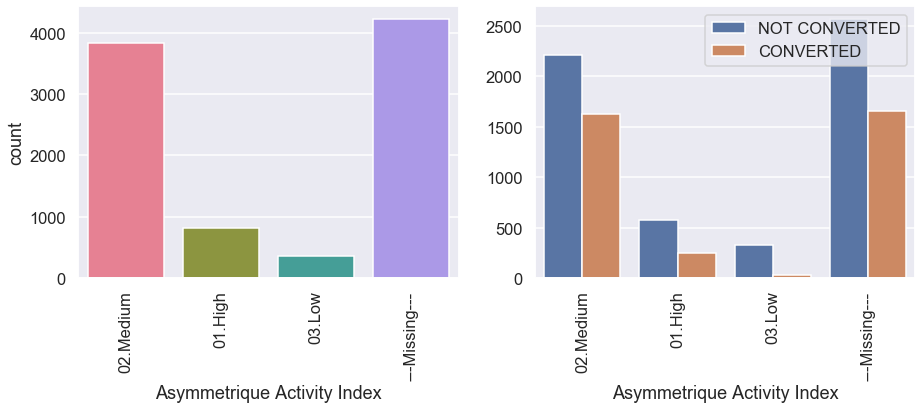

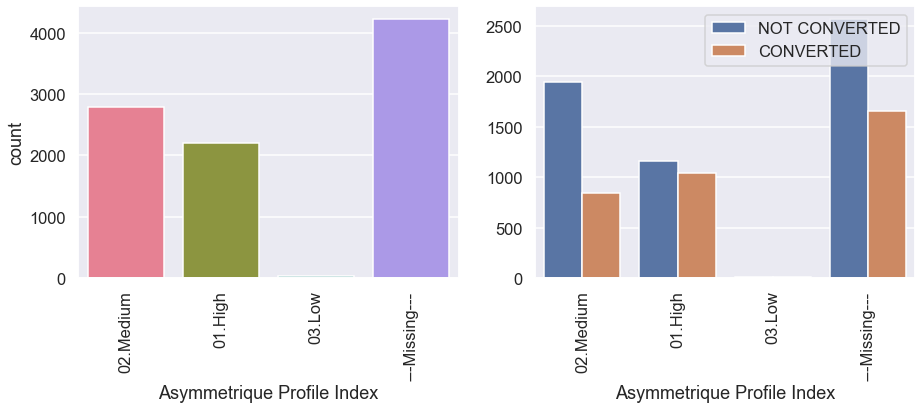

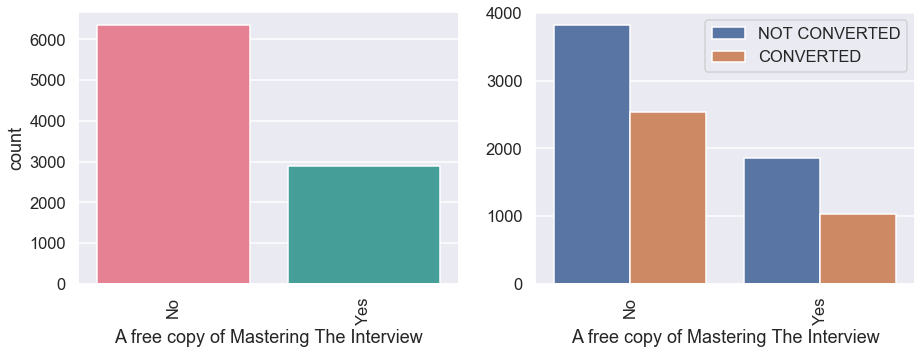

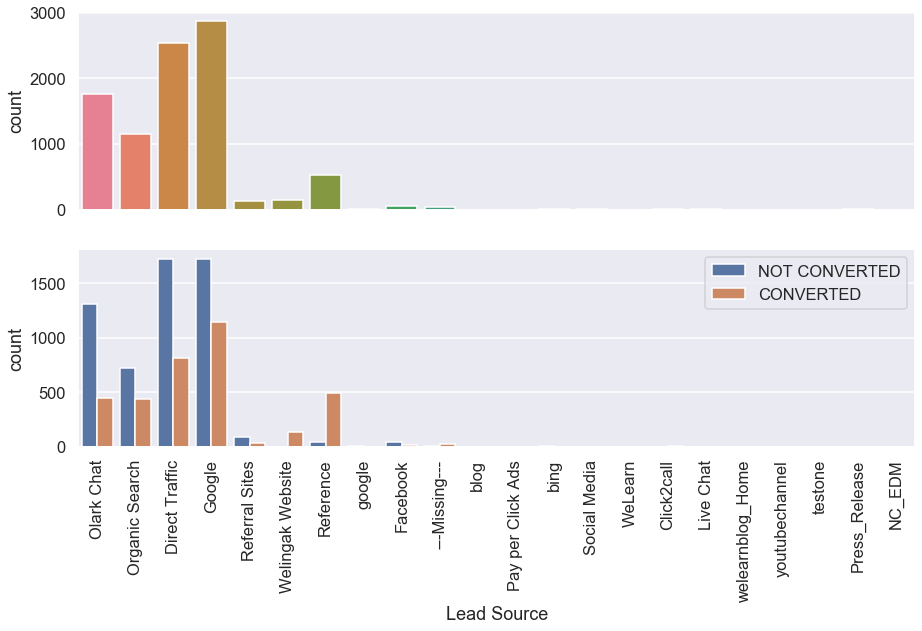

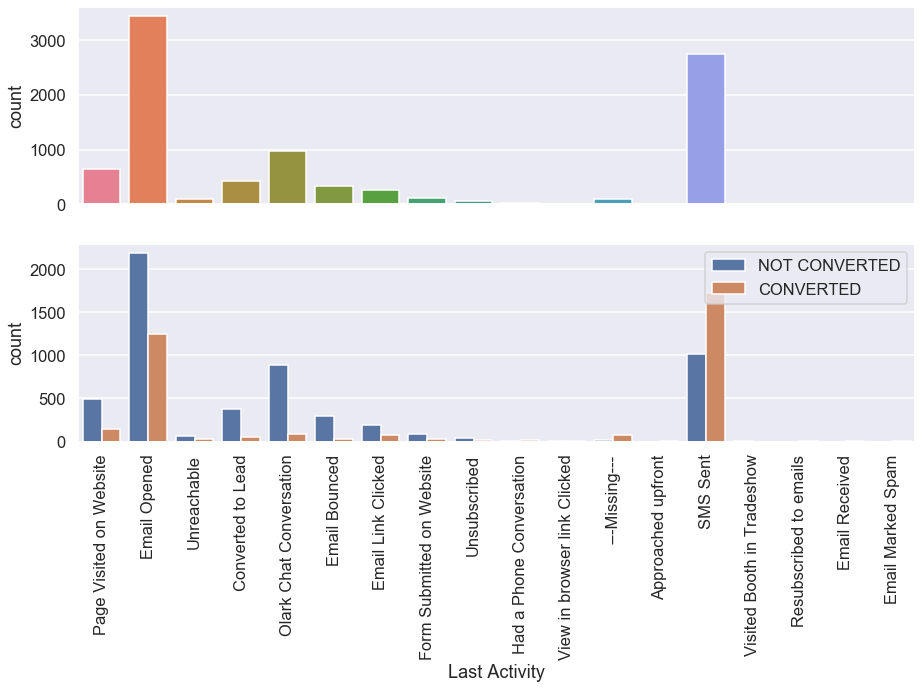

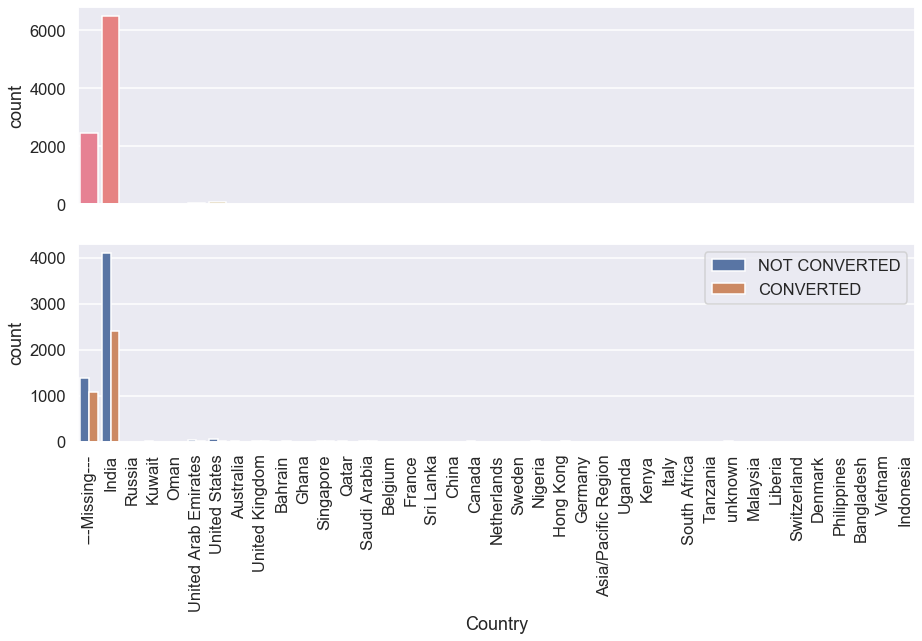

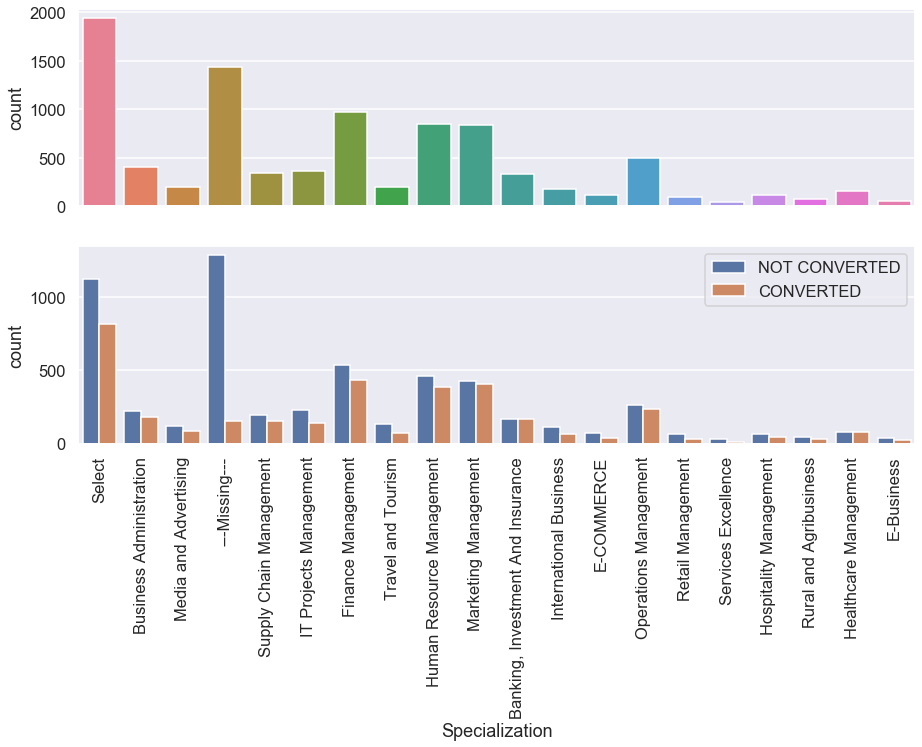

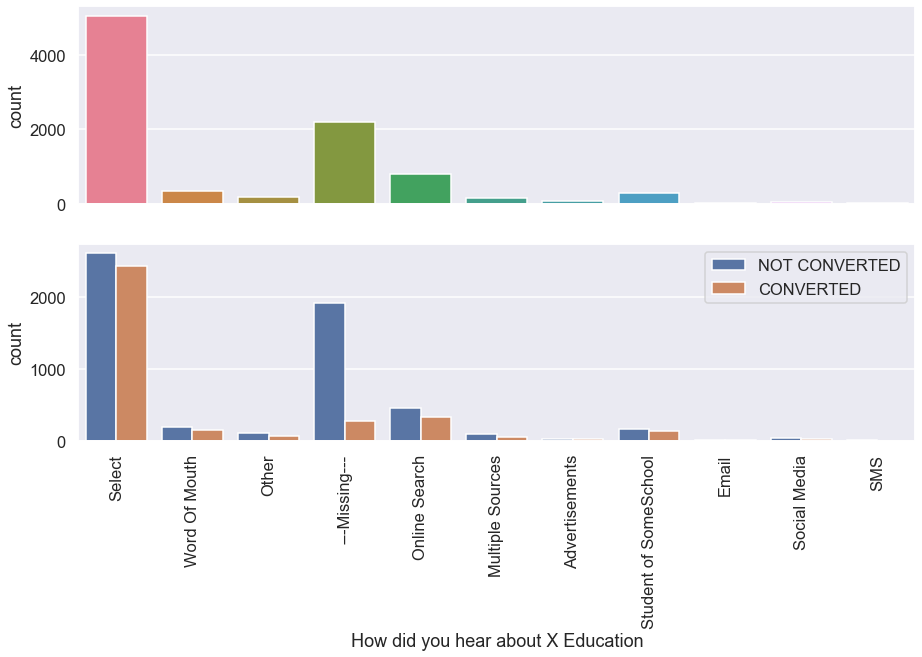

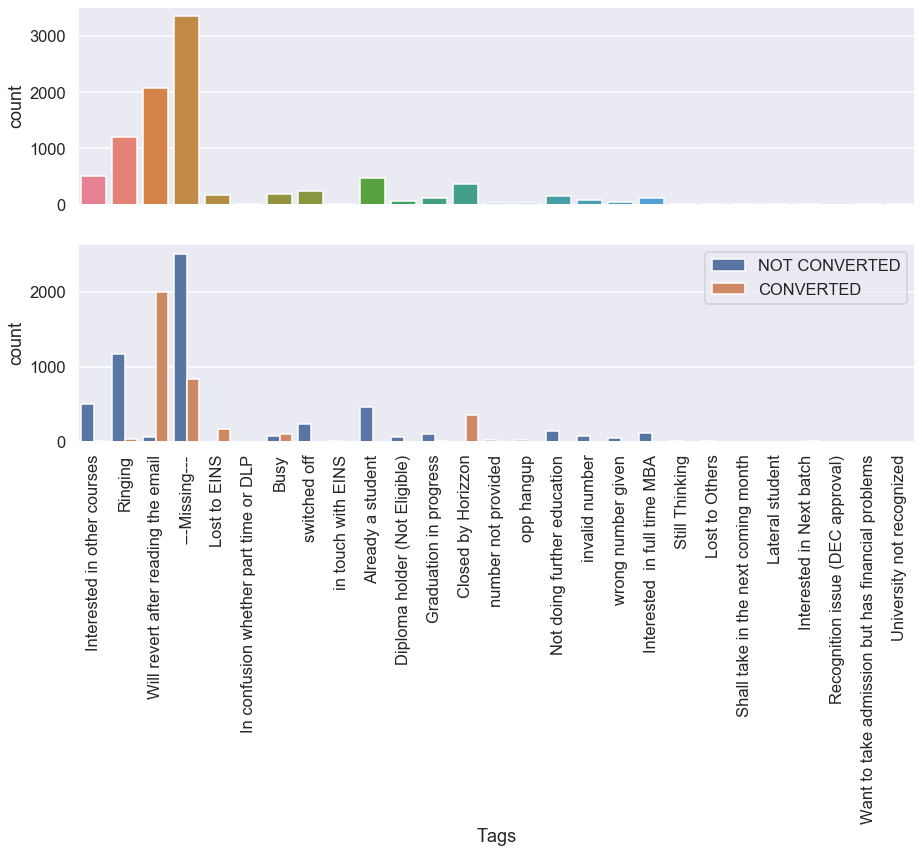

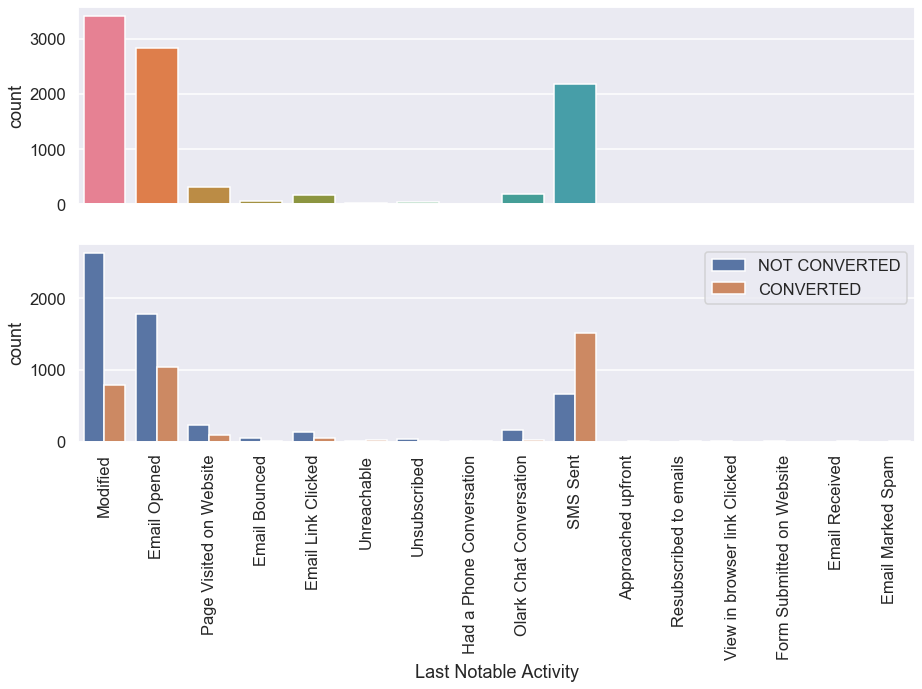

In [349]:
sns.color_palette("husl")
sns.set_context('talk')
plot_categorical(data, categorical_col,10)

### Observtions

##### Conversion ratio is very high for
1. Lead Add Form : LEAD ORIGIN
2. Working Professional: OCCUPATION
3. Reference: LEAD SOURCE

##### Other observations
- Conversion is there but very little from people who chose “Do not Email”
- All cities seems to have almost same conversion rate
- People having different specialisation doesn’t seem to impact the conversion rate.
- People who asks for mail after the call are more probable to convert.
- Mostly all prospects are from India, therefore we will try to map every other nation to "Abroad".
- Missing values are showing very different conversion rate compared to others.


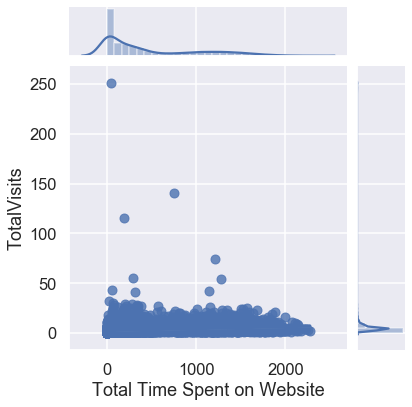

In [350]:
sns.jointplot('Total Time Spent on Website',
                 'TotalVisits',df, kind ="reg")

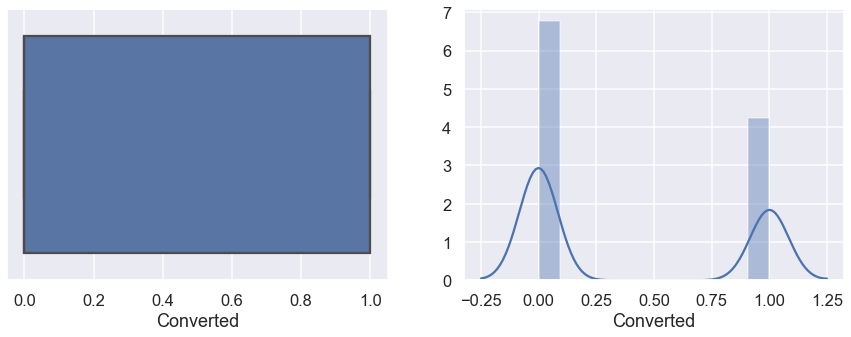

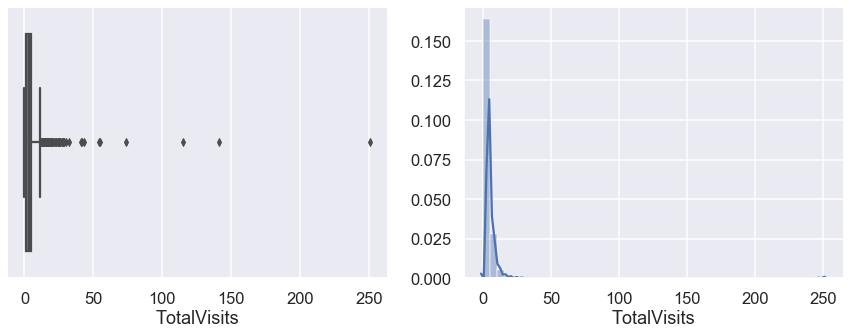

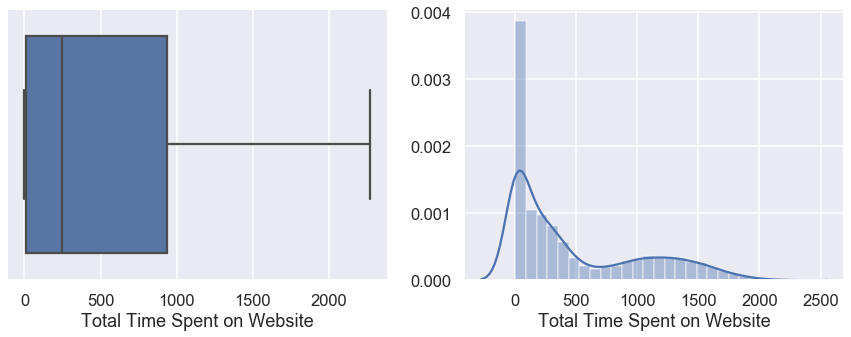

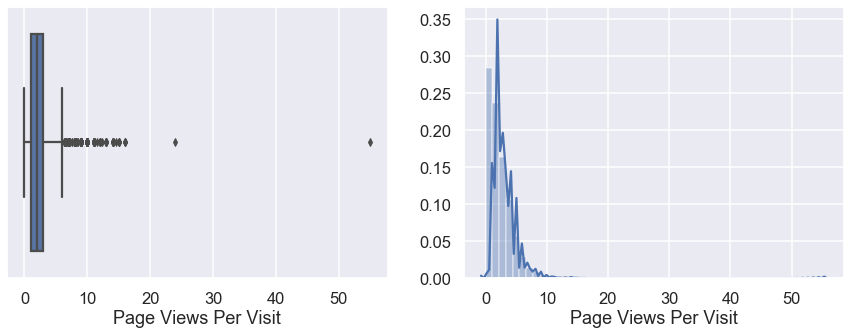

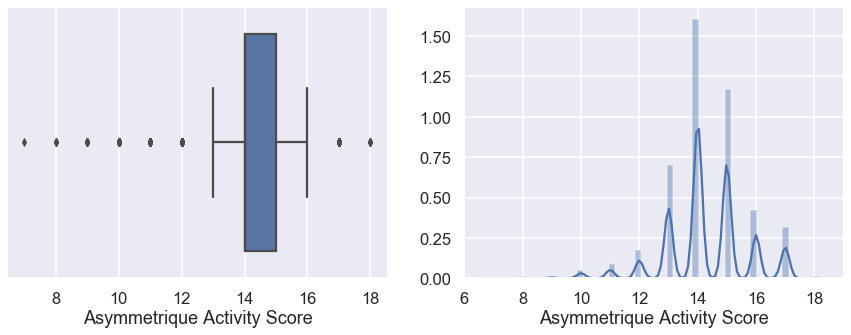

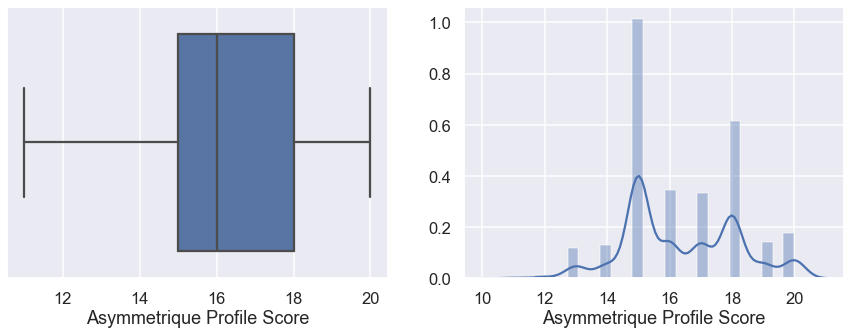

In [351]:
for columns in numerical_col:
    fig, (ax1, ax2)= plt.subplots(1,2, figsize=(15,5))
    #sns.hist(df["Converted"],ax=ax1, palette="husl")
    #ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    #sns.countplot(df["Total Visits"],hue=df["Converted"],ax=ax2)
    #ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    sns.boxplot(data=df, x=columns, ax=ax1)
    sns.distplot(df[columns],ax=ax2)

### Observation :

- As we can see from the histogram, the features `Total Visits`and `Page Views Per Visit` are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features.
- 'Asymmetrique Activity Score' and 'Asymmetrique Profile Score' are the features with no information given as per the feature description.

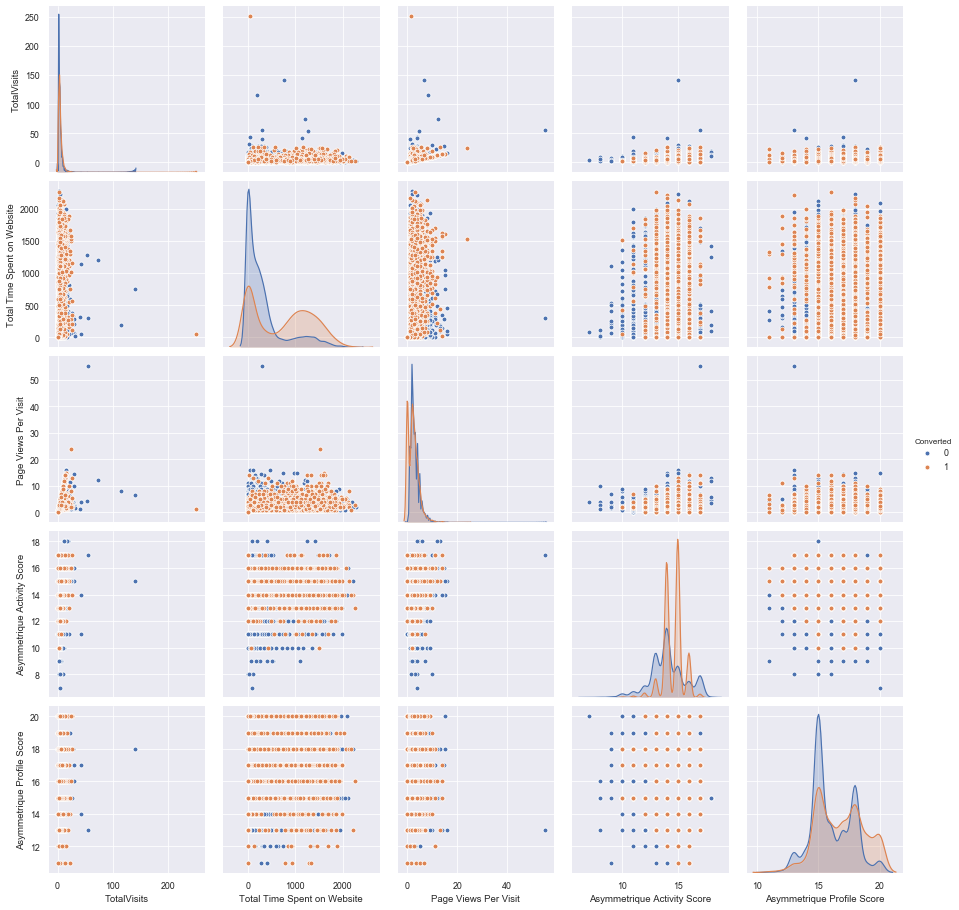

In [352]:
sns.set_context("paper")
sns.pairplot(df[numerical_col],hue="Converted")

# CLEANING DATA

In [353]:
dataset = df.copy()

In [354]:
dataset.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [355]:
dataset.drop(["Prospect ID","Lead Number"], axis=1, inplace=True)
dataset.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [356]:
fill_missing_values(dataset,categorical_col,"missing") # Replaced with "Missing" as missing values are showing very different characterstics
fill_missing_values(dataset,numerical_col,"median") #Median as there are a lot of outliers
dataset["Country"][(dataset["Country"]!="India") & (dataset["Country"]!="Missing")]="Others" # People from abroad are almost negligible in number


/Users/subodhjain/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [357]:
dataset = pd.get_dummies(dataset,drop_first=True)
dataset

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,...,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_01.High,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,15.0,15.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,15.0,15.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,14.0,20.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,13.0,17.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,15.0,18.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,15.0,17.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,14.0,19.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,13.0,20.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,1,0

# Applying Model

In [358]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score, classification_report, roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE

!pip install imblearn

In [359]:
# Seprating dependant and independant data
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

ss = StandardScaler()
ss.fit_transform(X)

array([[-0.71359317, -0.88997364, -1.09869938, ..., -0.05895116,
        -0.07150235, -0.01040369],
       [ 0.32401752,  0.33997174,  0.06644073, ..., -0.05895116,
        -0.07150235, -0.01040369],
       [-0.29854889,  1.90568857, -0.16658729, ..., -0.05895116,
        -0.07150235, -0.01040369],
       ...,
       [-0.29854889, -0.52682953, -0.16658729, ..., -0.05895116,
        -0.07150235, -0.01040369],
       [-0.09102676,  0.02062391,  0.29946875, ..., -0.05895116,
        -0.07150235, -0.01040369],
       [ 0.53153966,  1.44400284,  0.29946875, ..., -0.05895116,
        -0.07150235, -0.01040369]])

In [360]:
# function to analyse all model without oversampling
def run_model(X, y, models):
    
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=20)
    
    for model in models:
        m = model()
        m.fit(X_train, y_train)
        y_pred = m.predict(X_test)
        fpr, tpr, threshold = roc_curve(y_test,y_pred)
        print(str(model)+ "\n")
        print("CONFUSION MATRIX: \n{}\n".format(confusion_matrix(y_test,y_pred)))
        print("CLASSIFICATION REPORT: \n{} ".format(classification_report(y_test,y_pred)))
        print("MODEL SCORE: {}".format(m.score(X_test,y_test)))
        print("ROC AUC SCORE: {}\n ".format(roc_auc_score(y_test,y_pred)))
        
        print("RECALL: \n{}\n ".format(cross_val_score(m,X,y,scoring="recall").mean()))
        plt.plot(fpr, tpr)
        plt.show()
        precision, recall, thresholds=precision_recall_curve(y_test,y_pred)
        print(precision)
        print(recall)
        print(thresholds)
        print("===="*20)

/Users/subodhjain/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<class 'sklearn.linear_model._logistic.LogisticRegression'>

CONFUSION MATRIX: 
[[1071   65]
 [  96  616]]

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1136
           1       0.90      0.87      0.88       712

    accuracy                           0.91      1848
   macro avg       0.91      0.90      0.91      1848
weighted avg       0.91      0.91      0.91      1848
 
MODEL SCORE: 0.9128787878787878
ROC AUC SCORE: 0.9039751147333439
 


/Users/subodhjain/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/subodhjain/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

RECALL: 
0.8312270513891296
 


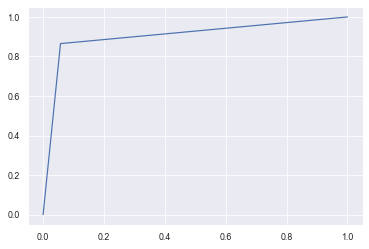

[0.38528139 0.90455213 1.        ]
[1.         0.86516854 0.        ]
[0 1]
<class 'sklearn.tree._classes.DecisionTreeClassifier'>

CONFUSION MATRIX: 
[[1057   79]
 [  73  639]]

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1136
           1       0.89      0.90      0.89       712

    accuracy                           0.92      1848
   macro avg       0.91      0.91      0.91      1848
weighted avg       0.92      0.92      0.92      1848
 
MODEL SCORE: 0.9177489177489178
ROC AUC SCORE: 0.9139648282956164
 
RECALL: 
0.8896449564271869
 


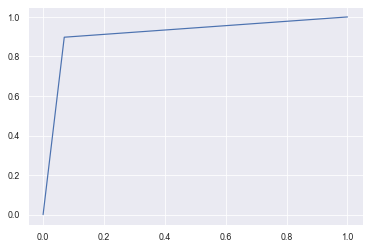

[0.38528139 0.88997214 1.        ]
[1.         0.89747191 0.        ]
[0 1]
<class 'sklearn.ensemble._forest.RandomForestClassifier'>

CONFUSION MATRIX: 
[[1104   32]
 [  62  650]]

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1136
           1       0.95      0.91      0.93       712

    accuracy                           0.95      1848
   macro avg       0.95      0.94      0.95      1848
weighted avg       0.95      0.95      0.95      1848
 
MODEL SCORE: 0.9491341991341992
ROC AUC SCORE: 0.9423761671150499
 
RECALL: 
0.9005933151582962
 


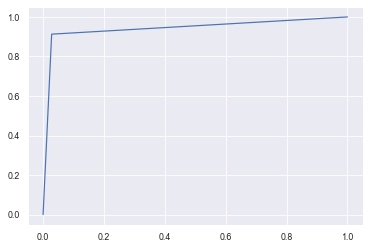

[0.38528139 0.95307918 1.        ]
[1.         0.91292135 0.        ]
[0 1]
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>

CONFUSION MATRIX: 
[[1100   36]
 [  67  645]]

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1136
           1       0.95      0.91      0.93       712

    accuracy                           0.94      1848
   macro avg       0.94      0.94      0.94      1848
weighted avg       0.94      0.94      0.94      1848
 
MODEL SCORE: 0.9442640692640693
ROC AUC SCORE: 0.9371043677797121
 
RECALL: 
0.8887924106087587
 


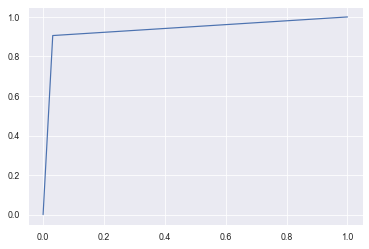

[0.38528139 0.94713656 1.        ]
[1.         0.90589888 0.        ]
[0 1]
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>

CONFUSION MATRIX: 
[[1100   36]
 [  63  649]]

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1136
           1       0.95      0.91      0.93       712

    accuracy                           0.95      1848
   macro avg       0.95      0.94      0.94      1848
weighted avg       0.95      0.95      0.95      1848
 
MODEL SCORE: 0.9464285714285714
ROC AUC SCORE: 0.939913356543757
 
RECALL: 
0.8854251698000221
 


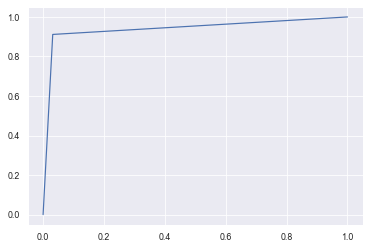

[0.38528139 0.94744526 1.        ]
[1.         0.91151685 0.        ]
[0 1]
<class 'xgboost.sklearn.XGBClassifier'>

CONFUSION MATRIX: 
[[1102   34]
 [  68  644]]

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1136
           1       0.95      0.90      0.93       712

    accuracy                           0.94      1848
   macro avg       0.95      0.94      0.94      1848
weighted avg       0.94      0.94      0.94      1848
 
MODEL SCORE: 0.9448051948051948
ROC AUC SCORE: 0.9372824022788416
 
RECALL: 
0.8803693839923099
 


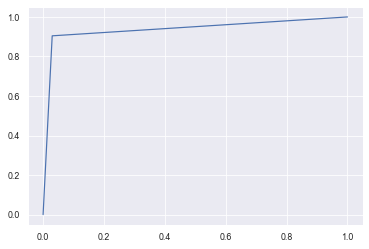

[0.38528139 0.94985251 1.        ]
[1.         0.90449438 0.        ]
[0 1]


In [361]:
#models = {"RandomForestClassifier": RandomForestClassifier()}
models = [LogisticRegression,DecisionTreeClassifier,RandomForestClassifier, 
          AdaBoostClassifier, GradientBoostingClassifier,XGBClassifier]
run_model(X,y,models)

##### After SMOTE (upsampling)

In [362]:
# function to analyse all model with oversampling
def run_model_balanced(X, y, models):
    
    
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=20)
    
    
    smote=SMOTE()
    b_X,b_y = smote.fit_sample(X_train,y_train)
    
    for model in models:
        m = model()
        m.fit(b_X, b_y)
        y_pred = m.predict(X_test)
        fpr, tpr, threshold = roc_curve(y_test,y_pred)
        print(str(model)+ "\n")
        print("CONFUSION MATRIX: \n{}\n".format(confusion_matrix(y_test,y_pred)))
        print("CLASSIFICATION REPORT: \n{} ".format(classification_report(y_test,y_pred)))
        print("MODEL SCORE: {}".format(m.score(X_test,y_test)))
        print("ROC AUC SCORE: {}\n ".format(roc_auc_score(y_test,y_pred)))
        print("RECALL: \n{}\n ".format(cross_val_score(m,X,y,scoring="recall").mean()))
        plt.plot(fpr, tpr)
        plt.show()
        print("===="*20)

/Users/subodhjain/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<class 'sklearn.linear_model._logistic.LogisticRegression'>

CONFUSION MATRIX: 
[[1031  105]
 [  83  629]]

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1136
           1       0.86      0.88      0.87       712

    accuracy                           0.90      1848
   macro avg       0.89      0.90      0.89      1848
weighted avg       0.90      0.90      0.90      1848
 
MODEL SCORE: 0.8982683982683982
ROC AUC SCORE: 0.895498694413673
 


/Users/subodhjain/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/subodhjain/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

RECALL: 
0.8312270513891296
 


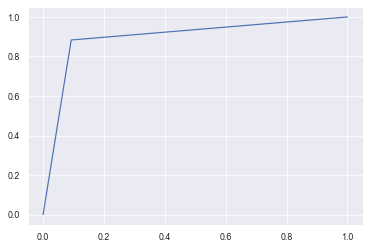

<class 'sklearn.tree._classes.DecisionTreeClassifier'>

CONFUSION MATRIX: 
[[1048   88]
 [  63  649]]

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1136
           1       0.88      0.91      0.90       712

    accuracy                           0.92      1848
   macro avg       0.91      0.92      0.91      1848
weighted avg       0.92      0.92      0.92      1848
 
MODEL SCORE: 0.9182900432900433
ROC AUC SCORE: 0.917026032600095
 
RECALL: 
0.8935763587941441
 


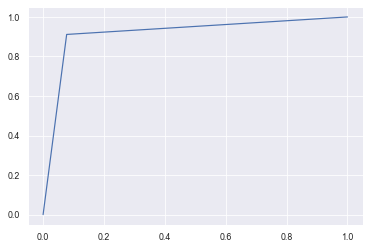

<class 'sklearn.ensemble._forest.RandomForestClassifier'>

CONFUSION MATRIX: 
[[1094   42]
 [  59  653]]

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1136
           1       0.94      0.92      0.93       712

    accuracy                           0.95      1848
   macro avg       0.94      0.94      0.94      1848
weighted avg       0.95      0.95      0.95      1848
 
MODEL SCORE: 0.9453463203463204
ROC AUC SCORE: 0.9400815002373794
 
RECALL: 
0.902840506169532
 


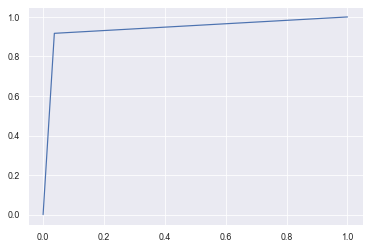

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>

CONFUSION MATRIX: 
[[1078   58]
 [  53  659]]

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1136
           1       0.92      0.93      0.92       712

    accuracy                           0.94      1848
   macro avg       0.94      0.94      0.94      1848
weighted avg       0.94      0.94      0.94      1848
 
MODEL SCORE: 0.939935064935065
ROC AUC SCORE: 0.93725272986232
 
RECALL: 
0.8887924106087587
 


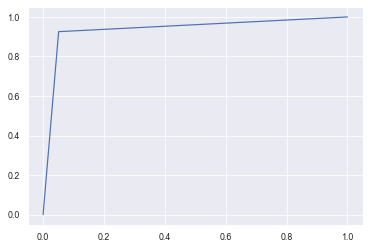

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>

CONFUSION MATRIX: 
[[1075   61]
 [  48  664]]

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1136
           1       0.92      0.93      0.92       712

    accuracy                           0.94      1848
   macro avg       0.94      0.94      0.94      1848
weighted avg       0.94      0.94      0.94      1848
 
MODEL SCORE: 0.941017316017316
ROC AUC SCORE: 0.9394435432821648
 
RECALL: 
0.8854251698000221
 


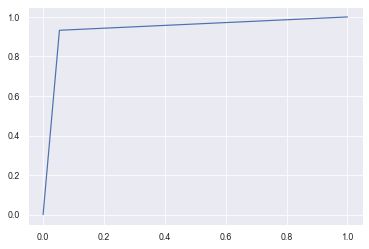

<class 'xgboost.sklearn.XGBClassifier'>

CONFUSION MATRIX: 
[[1075   61]
 [  49  663]]

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1136
           1       0.92      0.93      0.92       712

    accuracy                           0.94      1848
   macro avg       0.94      0.94      0.94      1848
weighted avg       0.94      0.94      0.94      1848
 
MODEL SCORE: 0.9404761904761905
ROC AUC SCORE: 0.9387412960911536
 
RECALL: 
0.8803693839923099
 


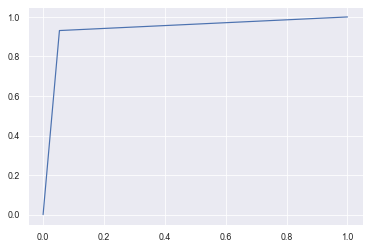

In [363]:
models = [LogisticRegression,DecisionTreeClassifier,RandomForestClassifier, 
          AdaBoostClassifier, GradientBoostingClassifier,XGBClassifier]
run_model_balanced(X,y,models)

##### Observation
- We are using random forest classifier as it shows best recall after cross validation
- Random forest is predicting with best recall value.(with cross validation)
- Score with and without oversampling is almost identical. We cannot call this dataset imbalanced(ratio-39:61). So no need to oversample.

#### Hyperparameter tuning 
- Some details about hyperparameters and it's tuning:
https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/

We will analyse three models (first two only for knowledge)
- Random Forest Classifier
- XGB Classifier
- Logistic Classifier (To solve the problem in hand)

### Random Forest Classifier

In [364]:
param={     "n_estimators":[int(x) for x in np.linspace(start = 10, stop = 190, num = 10) ],
            #"criterion":['gini','entropy'],
            "max_depth":[int(x) for x in np.linspace(50, 500, num = 6)],
            # "min_samples_split":[2, 5, 10],
            # "min_samples_leaf":[1, 2, 4],
            "max_features":['sqrt',"log2"],
            # "max_samples": [0.1,0.2,0.3],
            # "max_leaf_nodes": [25,50,75]     
      }

rf_classifier = RandomForestClassifier()
cv = RandomizedSearchCV(rf_classifier,param, verbose=2, scoring="recall", refit="recall")

In [365]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=20)

In [366]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=150, max_features=sqrt, max_depth=50 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=150, max_features=sqrt, max_depth=50, total=   1.3s
[CV] n_estimators=150, max_features=sqrt, max_depth=50 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=150, max_features=sqrt, max_depth=50, total=   1.4s
[CV] n_estimators=150, max_features=sqrt, max_depth=50 ...............
[CV]  n_estimators=150, max_features=sqrt, max_depth=50, total=   1.6s
[CV] n_estimators=150, max_features=sqrt, max_depth=50 ...............
[CV]  n_estimators=150, max_features=sqrt, max_depth=50, total=   1.4s
[CV] n_estimators=150, max_features=sqrt, max_depth=50 ...............
[CV]  n_estimators=150, max_features=sqrt, max_depth=50, total=   1.3s
[CV] n_estimators=170, max_features=log2, max_depth=410 ..............
[CV]  n_estimators=170, max_features=log2, max_depth=410, total=   1.3s
[CV] n_estimators=170, max_features=log2, max_depth=410 ..............
[CV]  n_estimators=170, max_features=log2, max_depth=410, total=   1.4s
[CV] n_estimators=170, max_features=log2, max_depth=410 ..............
[CV]  n_estimators=170, max_features=log2, max_depth=410, total=   1.3s
[CV] n_estimators=170, max_features=log2, max_depth=410 ..............
[CV

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   52.5s finished


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [50, 140, 230, 320, 410,
                                                      500],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [10, 30, 50, 70, 90,
                                                         110, 130, 150, 170,
                                                         190]},
                   refit='recall', scoring='recall', verbose=2)

In [367]:
cv.best_params_ #random

{'n_estimators': 130, 'max_features': 'sqrt', 'max_depth': 320}

CONFUSION MATRIX: 
[[1101   35]
 [  54  658]]

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1136
           1       0.95      0.92      0.94       712

    accuracy                           0.95      1848
   macro avg       0.95      0.95      0.95      1848
weighted avg       0.95      0.95      0.95      1848
 
MODEL SCORE: 0.9518398268398268
ROC AUC SCORE: 0.9466737221079283
 
RECALL: 
0.9241573033707865
 


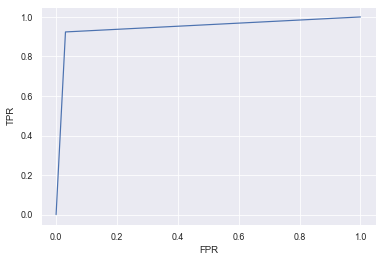

In [368]:
classifier_rf = RandomForestClassifier(n_estimators=170, max_depth= 230, max_features= "sqrt")
classifier_rf.fit(X_train,y_train)
y_pred=classifier_rf.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test,y_pred)
print("CONFUSION MATRIX: \n{}\n".format(confusion_matrix(y_test,y_pred)))
print("CLASSIFICATION REPORT: \n{} ".format(classification_report(y_test,y_pred)))
print("MODEL SCORE: {}".format(classifier_rf.score(X_test,y_test)))
print("ROC AUC SCORE: {}\n ".format(roc_auc_score(y_test,y_pred)))
print("RECALL: \n{}\n ".format(recall_score(y_test,y_pred)))
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [370]:
pd.Series(classifier_rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)

Tags_Will revert after reading the email    0.163329
Total Time Spent on Website                 0.114099
Tags_Ringing                                0.049922
Lead Profile_Potential Lead                 0.034194
Last Activity_SMS Sent                      0.033579
Asymmetrique Activity Score                 0.032646
Last Notable Activity_SMS Sent              0.032418
Lead Quality_Might be                       0.029525
Lead Origin_Lead Add Form                   0.028054
Tags_Closed by Horizzon                     0.025892
dtype: float64

### XGB Classifier

In [371]:
## Hyper Parameter Optimization
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]  
}

In [372]:
classifier=XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='recall', n_jobs=-1,cv=5,verbose=2)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='recall', verbose=2)

In [373]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=12)

CONFUSION MATRIX: 
[[1096   40]
 [  58  654]]

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1136
           1       0.94      0.92      0.93       712

    accuracy                           0.95      1848
   macro avg       0.95      0.94      0.94      1848
weighted avg       0.95      0.95      0.95      1848
 
MODEL SCORE: 0.946969696969697
ROC AUC SCORE: 0.9416640291185314
 
RECALL: 
0.9185393258426966
 


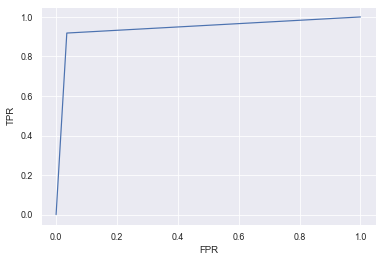

In [374]:
classifier_xgb = XGBClassifier(colsample_bytree=0.4, gamma=0.1, learning_rate=0.25,min_child_weight=3)

classifier_xgb.fit(X_train,y_train)
y_pred=classifier_xgb.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test,y_pred)
print("CONFUSION MATRIX: \n{}\n".format(confusion_matrix(y_test,y_pred)))
print("CLASSIFICATION REPORT: \n{} ".format(classification_report(y_test,y_pred)))
print("MODEL SCORE: {}".format(classifier_xgb.score(X_test,y_test)))
print("ROC AUC SCORE: {}\n ".format(roc_auc_score(y_test,y_pred)))
print("RECALL: \n{}\n ".format(recall_score(y_test,y_pred)))
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [375]:
pd.Series(classifier_xgb.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)

Tags_Will revert after reading the email                                 0.162463
Lead Origin_Lead Add Form                                                0.100020
Last Notable Activity_SMS Sent                                           0.066774
Lead Source_Reference                                                    0.060795
Lead Quality_Low in Relevance                                            0.051194
Tags_Ringing                                                             0.049036
Lead Profile_Potential Lead                                              0.042262
Tags_Closed by Horizzon                                                  0.037049
What matters most to you in choosing a course_Better Career Prospects    0.036758
Last Notable Activity_Email Opened                                       0.033759
dtype: float32

### Logistic Regression

##### Threshold
- We will find out the threshold for which we can get maximum recall value with precision more than 80%.
- We will find these score on train dataset so that we dont overfit the model for predicting threshold.

##### Scoring
- Then we will generate a function to give scores to the leads.

In [376]:
classifier_log = LogisticRegression()
classifier_log.fit(X_train, y_train)
y_pred_prob_log = classifier_log.predict_proba(X_train)
y_pred_prob_log = y_pred_prob_log[:,1]

/Users/subodhjain/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [377]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [378]:
thresholds = np.arange(0, 1, 0.001)
scores_recall = [recall_score(y_train, to_labels(y_pred_prob_log, t)) for t in thresholds]
scores_precision = [precision_score(y_train, to_labels(y_pred_prob_log, t)) for t in thresholds]
data = {"thresholds": thresholds,"recall":scores_recall,"precision":scores_precision}
final_df = pd.DataFrame(data)
final_df = final_df[final_df.precision>=0.8]

final_df.head()

,thresholds,recall,precision
208,0.208,0.941734,0.800418
209,0.209,0.941734,0.801613
210,0.210,0.941383,0.802754
211,0.211,0.941032,0.803416
212,0.212,0.939979,0.803963


CONFUSION MATRIX: 
[[957 179]
 [ 41 671]]

CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1136
           1       0.79      0.94      0.86       712

    accuracy                           0.88      1848
   macro avg       0.87      0.89      0.88      1848
weighted avg       0.89      0.88      0.88      1848
 
ROC AUC SCORE: 0.8924226539009338
 
RECALL: 
0.9424157303370787
 
PRECISION: 
0.7894117647058824
 


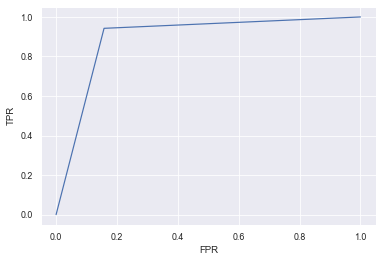

In [379]:
THRESHOLD=0.208
final_y_pred = classifier_log.predict_proba(X_test)
final_y_pred = np.where(final_y_pred[:,1]>THRESHOLD,1,0)

fpr, tpr, threshold = roc_curve(y_test,final_y_pred)
print("CONFUSION MATRIX: \n{}\n".format(confusion_matrix(y_test,final_y_pred)))
print("CLASSIFICATION REPORT: \n{} ".format(classification_report(y_test,final_y_pred)))
print("ROC AUC SCORE: {}\n ".format(roc_auc_score(y_test,final_y_pred)))
print("RECALL: \n{}\n ".format(recall_score(y_test,final_y_pred)))
print("PRECISION: \n{}\n ".format(precision_score(y_test,final_y_pred)))
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

##### Observation
- Threshold for max recall with precision greater than 80% is 0.208
- Precision for test dataset is approximately 79% which is very much acceptable.
- Hence, 0.208 is the threshold we will use for Logistic Classification

In [383]:
def lead_score(X):
    score = pd.Series((classifier_log.predict_proba(X)[:,1]*100).round(), name="score")
    X = pd.concat([X,score], axis=1)
    return X

In [384]:
leadscore = lead_score(X)

In [385]:
leadscore

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,...,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_01.High,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,score
0,0.0,0,0.00,15.0,15.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8.0
1,5.0,674,2.50,15.0,15.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4.0
2,2.0,1532,2.00,14.0,20.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,100.0
3,1.0,305,1.00,13.0,17.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0
4,2.0,1428,1.00,15.0,18.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,8.0,1845,2.67,15.0,17.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,100.0
9236,2.0,238,2.00,14.0,19.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,82.0
9237,2.0,199,2.00,13.0,20.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,

In [386]:
leadscore["score"]

0         8.0
1         4.0
2       100.0
3         0.0
4        98.0
        ...  
9235    100.0
9236     82.0
9237     11.0
9238     46.0
9239    100.0
Name: score, Length: 9240, dtype: float64